In [6]:
import pandas as pd

# Load the dataset (replace the path with your dataset's path)
df = pd.read_csv('D:\SMS Spam Detection System\DataCSV\sms-spam.csv', encoding='latin-1')

# Preview the first 5 rows
df.head()


,ï»¿v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.columns

Index(['ï»¿v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df = df[['ï»¿v1', 'v2']]  # Keep only the 'v1' and 'v2' columns
df.columns = ['label', 'message']  # Rename columns for better understanding
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
import re

def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    return text

# Apply the clean_text function to the 'message' column
df['cleaned_message'] = df['message'].apply(clean_text)
df.head()


C:\Users\PRAVE\AppData\Local\Temp\ipykernel_17556\2730502421.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_message'] = df['message'].apply(clean_text)


,label,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [11]:
df['label'].value_counts()


label
ham     4825
spam     747
Name: count, dtype: int64

<Axes: title={'center': 'Spam vs Ham'}, xlabel='label'>

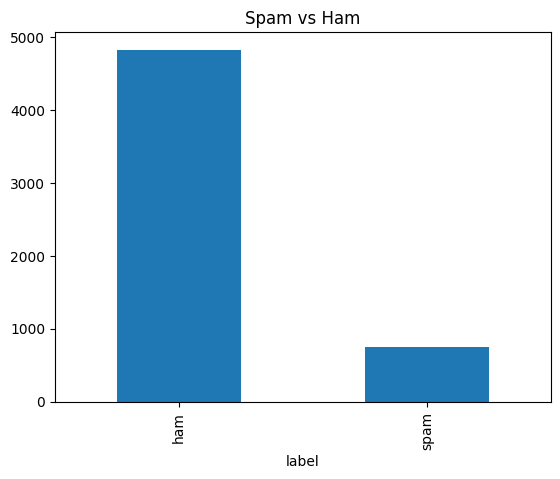

In [12]:
df['label'].value_counts().plot(kind='bar', title='Spam vs Ham')


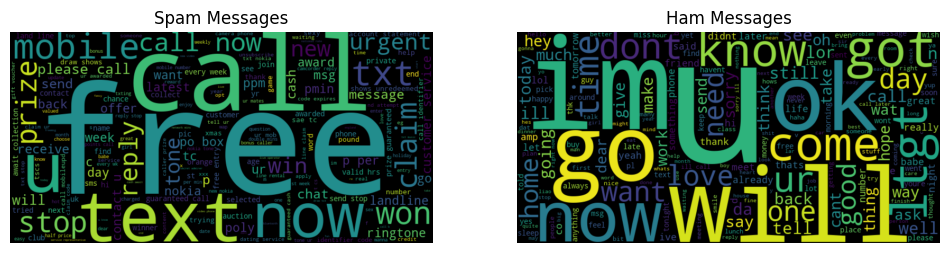

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the cleaned messages into one large string
spam_text = ' '.join(df[df['label'] == 'spam']['cleaned_message'])
ham_text = ' '.join(df[df['label'] == 'ham']['cleaned_message'])

# Create WordCloud objects for both spam and ham
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_text)
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_text)

# Set up the figure for displaying both word clouds side by side
plt.figure(figsize=(12, 6))

# Display the spam word cloud
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages')
plt.axis('off')  # Hide the axes for a cleaner visualization

# Display the ham word cloud
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages')
plt.axis('off')  # Hide the axes for a cleaner visualization

# Show the word clouds
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [19]:
X = df['cleaned_message']
y = df['label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical vectors using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [20]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [21]:
y_pred = model.predict(X_test)

# Print the accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9820627802690582
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       965
        spam       0.96      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, 'spam_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [23]:
# Load the saved model and vectorizer
model = joblib.load('spam_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')


In [24]:
def predict_sms(message):
    # Clean the message
    cleaned_message = clean_text(message)

    # Convert the message to a vector using the same vectorizer
    message_vector = vectorizer.transform([cleaned_message])

    # Predict the label using the trained model
    prediction = model.predict(message_vector)

    # Return the prediction result
    return prediction[0]

# Test with some sample messages
print(predict_sms("Congratulations! You've won a free iPhone, click here to claim it!"))
print(predict_sms("Hello, I hope you're doing well. Let's catch up soon."))


spam
ham
